## Importing the Libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


#pd.set_option('display.max_rows', None)

## Reading and Analyzing the Dataset

In [78]:
data = pd.read_csv('housing data.csv')

In [79]:
data.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [80]:
print('No of rows', data.shape[0])
print('No of columns', data.shape[1])

No of rows 1418
No of columns 13


In [81]:
data.tail()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125
1417,1418,5,1965,1256,SBrkr,1256,1,Attchd,1,276,NaN,NaN,147500


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


From the data.info we can see that there are missing values in Electrical, GarageType, Fence and MiscFeatures

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


In [84]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


From the above describe function we can get a Hint of outliers in some columns like GrageArea, TotalBsmtSF, GrLivArea

In [85]:
data.corr(numeric_only=True)

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.029188,-0.017960,-0.019396,0.002991,-0.000113,0.015633,0.014457,-0.029967
OverallQual,-0.029188,1.000000,0.584692,0.545747,0.592881,0.550112,0.609104,0.567796,0.791478
YearBuilt,-0.017960,0.584692,1.000000,0.396971,0.204757,0.478441,0.550275,0.492807,0.528006
TotalBsmtSF,-0.019396,0.545747,0.396971,1.000000,0.456365,0.326705,0.442614,0.495600,0.619852
GrLivArea,0.002991,0.592881,0.204757,0.456365,1.000000,0.626942,0.472139,0.470736,0.709503
FullBath,-0.000113,0.550112,0.478441,0.326705,0.626942,1.000000,0.473365,0.408453,0.562269
GarageCars,0.015633,0.609104,0.550275,0.442614,0.472139,0.473365,1.000000,0.884674,0.647676
GarageArea,0.014457,0.567796,0.492807,0.495600,0.470736,0.408453,0.884674,1.000000,0.627264
SalePrice,-0.029967,0.791478,0.528006,0.619852,0.709503,0.562269,0.647676,0.627264,1.000000


In [86]:
data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

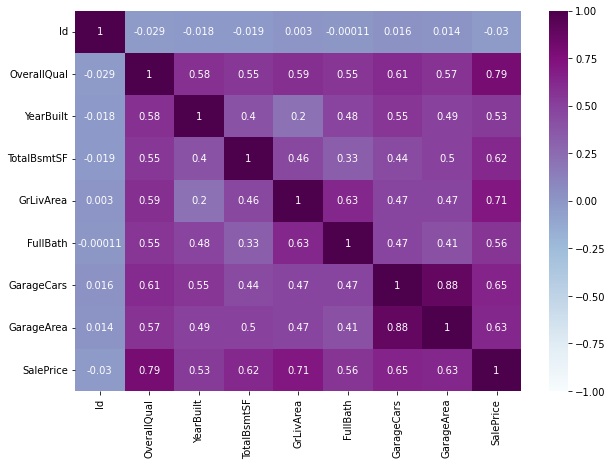

In [87]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='BuPu')
plt.show()

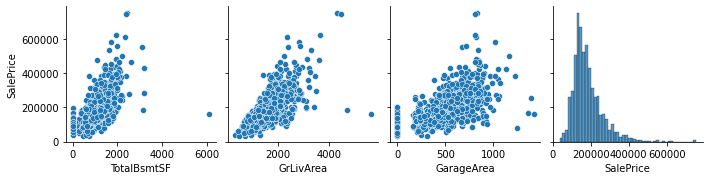

In [88]:
sns.pairplot(x_vars=['TotalBsmtSF','GrLivArea','GarageArea','SalePrice'], y_vars=['SalePrice'],data=data)

## Univariate and Bivariate Analysis

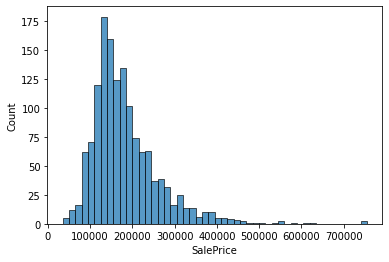

In [89]:
# Histogram for the taget Variable
sns.histplot(data['SalePrice'])
plt.show()

Skewness:  1.8646120239750106
Kurtosis:  6.432852054835754


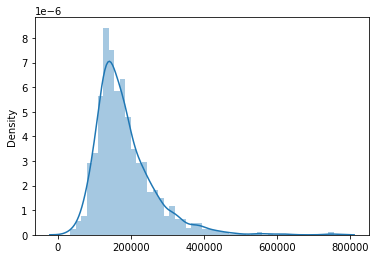

In [90]:
print('Skewness: ',data['SalePrice'].skew())
print('Kurtosis: ',data['SalePrice'].kurt())
sns.distplot(x=data['SalePrice'])
plt.show()

In [91]:
# Box plots between Sale price and some categortical columns

<Axes: xlabel='GarageType', ylabel='SalePrice'>

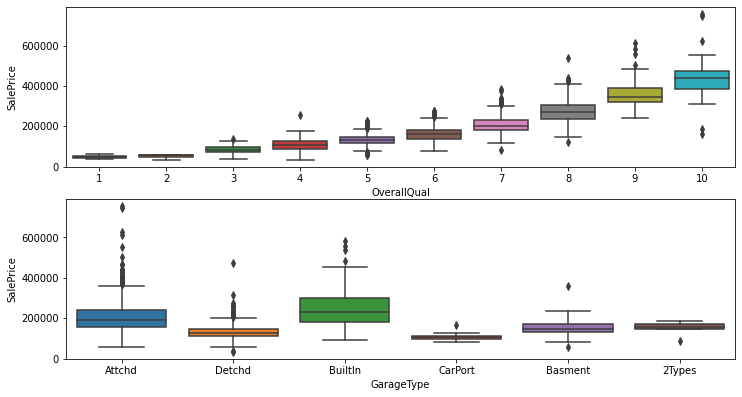

In [92]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.boxplot(y=data['SalePrice'], x= data['OverallQual'])
plt.subplot(3,1,2)
sns.boxplot(y=data['SalePrice'], x= data['GarageType'])

In [93]:
data[data['OverallQual']==1]['SalePrice'].median()

50150.0

In [94]:
data[data['OverallQual']==2]['SalePrice'].median()

60000.0

In [95]:
data[data['OverallQual']==3]['SalePrice'].median()

85000.0

## Detecting and Treating the Missing Values

In [96]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [97]:
missing = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

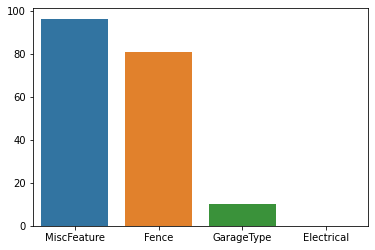

In [98]:
missing = missing[missing>0]
sns.barplot(x=missing.index, y=missing)
plt.show()

In [99]:
data[data['Electrical'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [100]:
data['Electrical'].value_counts()
print('Mode is',data['Electrical'].mode())

Mode is 0    SBrkr
Name: Electrical, dtype: object


In [101]:
data.iloc[[1338,1339,1340],:]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,NaN,NaN,83000
1339,1340,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,NaN,NaN,58500


In [102]:
data['Electrical'].ffill(inplace=True)

In [103]:
data.iloc[[1338,1339,1340],:]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1338,1339,6,1973,483,SBrkr,987,1,Detchd,1,264,NaN,NaN,83000
1339,1340,5,2006,384,SBrkr,1394,2,BuiltIn,2,400,NaN,NaN,167500
1340,1341,3,1914,864,FuseF,864,1,Detchd,1,200,NaN,NaN,58500


In [104]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [105]:
data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),'NoGarage',data['GarageType'])

In [106]:
data[data['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,48,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1264,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,1318,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,1358,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [107]:
data.groupby(by=['GarageCars','GarageType'])['GarageType'].count()

GarageCars  GarageType
0           NoGarage       81
1           Attchd        105
            Basment         8
            BuiltIn         8
            CarPort         3
            Detchd        178
2           2Types          1
            Attchd        556
            Basment        11
            BuiltIn        49
            CarPort         6
            Detchd        164
3           2Types          4
            Attchd        138
            BuiltIn        30
            Detchd          9
4           2Types          1
            Attchd          1
            Detchd          3
Name: GarageType, dtype: int64

In [108]:
data['GarageType'] = np.where((data['GarageType'].isnull())&(data['GarageCars']==1),'Detchd',data['GarageType'])

In [109]:
data['GarageType'].isnull().sum()

0

In [110]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
Id              0.000000
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
Electrical      0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageType      0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [111]:
data.drop(columns=['MiscFeature','Fence'], inplace=True)

In [112]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

Id             0.0
OverallQual    0.0
YearBuilt      0.0
TotalBsmtSF    0.0
Electrical     0.0
GrLivArea      0.0
FullBath       0.0
GarageType     0.0
GarageCars     0.0
GarageArea     0.0
SalePrice      0.0
dtype: float64

## Detecting and treating the Outliers

In [113]:
data.columns

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical',
       'GrLivArea', 'FullBath', 'GarageType', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<Axes: >

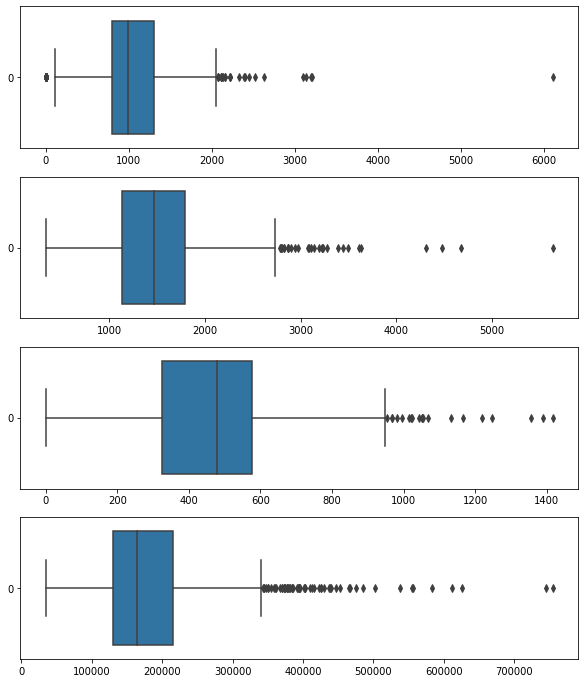

In [114]:
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
sns.boxplot(data['TotalBsmtSF'],orient='h')
plt.subplot(4,1,2)
sns.boxplot(data['GrLivArea'],orient='h')
plt.subplot(4,1,3)
sns.boxplot(data['GarageArea'],orient='h')
plt.subplot(4,1,4)
sns.boxplot(data['SalePrice'],orient='h')

In [115]:
data[data['TotalBsmtSF']==0]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
16,17,4,1967,0,SBrkr,1296,2,CarPort,2,516,90000
37,38,4,1955,0,FuseP,1152,2,NoGarage,0,0,82000
81,82,4,1950,0,FuseA,1040,1,Detchd,2,420,109900
91,92,5,1979,0,SBrkr,1535,2,Attchd,2,410,118964
166,167,5,1957,0,SBrkr,1340,1,Detchd,1,252,120000
240,241,5,1956,0,FuseA,882,1,Detchd,1,308,97000
323,324,3,1949,0,FuseA,1040,2,Detchd,2,400,87500
343,344,7,2003,0,SBrkr,1922,3,BuiltIn,2,672,198500
352,353,4,1959,0,SBrkr,1588,2,Detchd,2,680,134432
497,498,4,1900,0,FuseA,1294,2,NoGarage,0,0,106250


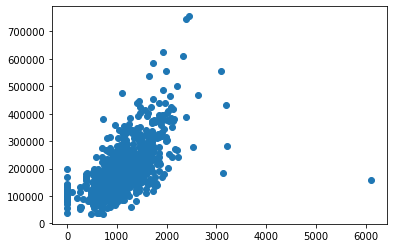

In [116]:
plt.scatter(x= data['TotalBsmtSF'], y=data['SalePrice'])

In [117]:
data[data['TotalBsmtSF']>6000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [118]:
data.drop(index=[1260], inplace=True)

<Axes: >

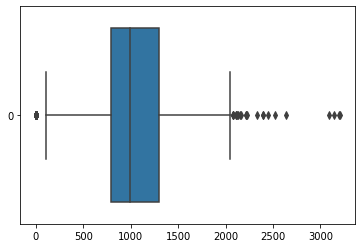

In [119]:
sns.boxplot(data['TotalBsmtSF'],orient='h')

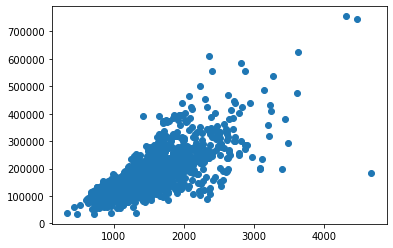

In [120]:
plt.scatter(x= data['GrLivArea'], y=data['SalePrice'])

In [121]:
data[data['GrLivArea']>4000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,184750
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [122]:
data.drop(index=[500], inplace=True)

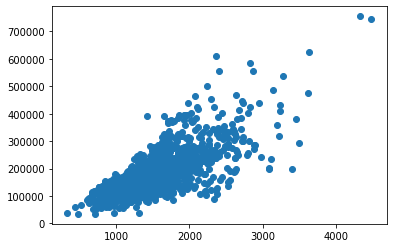

In [123]:
plt.scatter(x= data['GrLivArea'], y=data['SalePrice'])

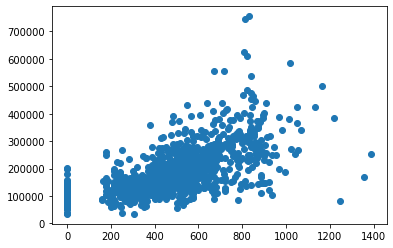

In [124]:
plt.scatter(x= data['GarageArea'], y=data['SalePrice'])

In [125]:
data[data['GarageArea']>1200]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
558,559,8,2008,2042,SBrkr,2042,2,Attchd,3,1390,253293
797,798,10,2007,2078,SBrkr,2084,2,Attchd,3,1220,385000
1028,1029,3,1935,894,SBrkr,894,1,Detchd,3,1248,81000
1155,1156,4,1961,1249,SBrkr,1622,1,2Types,4,1356,168000


In [126]:
data.drop(index=[558,1028,1155], inplace=True)

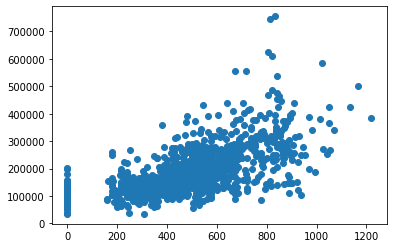

In [127]:
plt.scatter(x= data['GarageArea'], y=data['SalePrice'])

In [128]:
data[data['SalePrice']>700000]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [129]:
data[(data['OverallQual']==10)&(data['GrLivArea']>4300)&(data['GarageCars']==3)]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,666,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,1148,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


## Feature Selection

In [130]:
data.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000


In [131]:
del data['Id']

In [132]:
# We need to check for multicolinearity

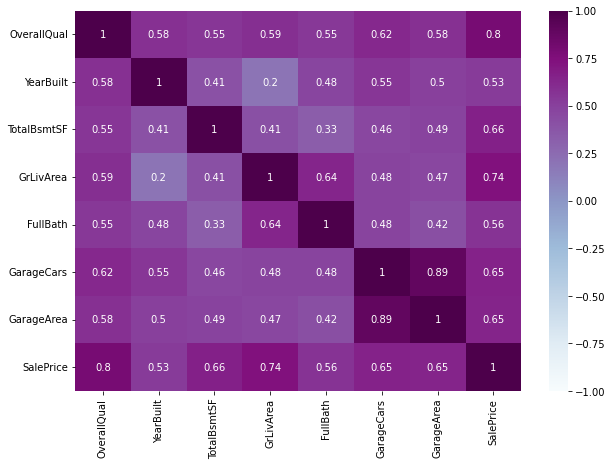

In [133]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='BuPu')
plt.show()

In [134]:
# Since garagecars and garagearea have almost 90% correlation we have to remove any
# one column to avoid multicolinearity (we choose garagecars as its a categorical data)

In [135]:
del data['GarageCars']

In [136]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageArea,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,548,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,460,181500
2,7,2001,920,SBrkr,1786,2,Attchd,608,223500
3,7,1915,756,SBrkr,1717,1,Detchd,642,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,836,250000


## Feature Engineering

In [137]:
data = pd.get_dummies(data, drop_first=True,dtype=int)

In [138]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856,1710,2,548,208500,0,0,0,1,1,0,0,0,0,0
1,6,1976,1262,1262,2,460,181500,0,0,0,1,1,0,0,0,0,0
2,7,2001,920,1786,2,608,223500,0,0,0,1,1,0,0,0,0,0
3,7,1915,756,1717,1,642,140000,0,0,0,1,0,0,0,0,1,0
4,8,2000,1145,2198,2,836,250000,0,0,0,1,1,0,0,0,0,0


In [139]:
data.dtypes

OverallQual            int64
YearBuilt              int64
TotalBsmtSF            int64
GrLivArea              int64
FullBath               int64
GarageArea             int64
SalePrice              int64
Electrical_FuseF       int32
Electrical_FuseP       int32
Electrical_Mix         int32
Electrical_SBrkr       int32
GarageType_Attchd      int32
GarageType_Basment     int32
GarageType_BuiltIn     int32
GarageType_CarPort     int32
GarageType_Detchd      int32
GarageType_NoGarage    int32
dtype: object

In [140]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,SalePrice,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
0,7,2003,856,1710,2,548,208500,0,0,0,1,1,0,0,0,0,0
1,6,1976,1262,1262,2,460,181500,0,0,0,1,1,0,0,0,0,0
2,7,2001,920,1786,2,608,223500,0,0,0,1,1,0,0,0,0,0
3,7,1915,756,1717,1,642,140000,0,0,0,1,0,0,0,0,1,0
4,8,2000,1145,2198,2,836,250000,0,0,0,1,1,0,0,0,0,0


In [141]:
col_names = data.columns

## Train Test Split

In [142]:
x = data.drop(columns=['SalePrice'])
y = data['SalePrice']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=2)

In [145]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1130, 16) (283, 16) (1130,) (283,)


## Scalling

In [147]:
for i in ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea']:
    sc=StandardScaler()
    x_train[i] = sc.fit_transform(pd.DataFrame(x_train[i]))
    x_test[i] = sc.transform(pd.DataFrame(x_test[i]))

In [148]:
x_train.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageArea,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage
496,7,-1.530290,0.541029,1.162772,1,-0.866320,0,0,0,1,0,0,0,0,1,0
621,5,-0.727290,-2.547397,-0.899367,1,-0.211510,0,0,0,1,0,0,0,0,1,0
943,7,0.945627,-0.918470,-0.231969,2,0.120641,0,0,0,1,0,0,0,0,1,0
146,6,0.410294,0.434532,-0.531699,2,0.244011,0,0,0,1,1,0,0,0,0,0
713,5,-2.065623,-1.908412,-0.132060,2,-0.496210,0,0,0,1,0,0,0,0,1,0


## Neural network

In [253]:
# Define a function for NN model

In [154]:
def seqmodel(arr):  # [8,16,32,16,8,4,1]
    model = Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i], input_dim = arr[0], activation='relu'))
            else:
                model.add(Dense(arr[i], activation='relu'))
                model.add(Dropout(0.2))
    model.add(Dense(arr[-1],activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
    return model
        

In [155]:
# Def a function for model evaluation
def eval_model(model,xtrain,ytrain,xtest,ytest):
    history= model.fit(xtrain,ytrain, epochs=200, verbose=0)
    
    plt.plot(history.history['mean_squared_error'])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    
    y_pred = model.predict(xtest)
    print('R2: ',r2_score(y_test,y_pred))
    print('MSE: ',mean_squared_error(y_test,y_pred))
    print('RMSE: ',(mean_squared_error(y_test,y_pred))**0.5)
    print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred))
    
    

9/9 [==============================] - 0s 2ms/step
R2:  0.8073378083627383
MSE:  1342331412.4627452
RMSE:  36637.8412636818
MAPE:  0.14295569641363393


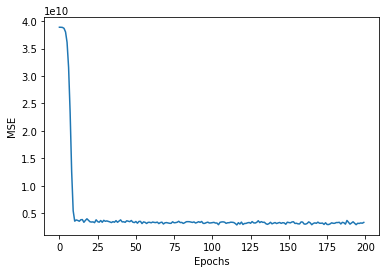

In [156]:
eval_model(seqmodel([16,30,50,20,10,1]), x_train,y_train,x_test,y_test)

9/9 [==============================] - 0s 1ms/step
R2:  0.8613941569967609
MSE:  965705701.9491707
RMSE:  31075.805732903704
MAPE:  0.1150986331284909


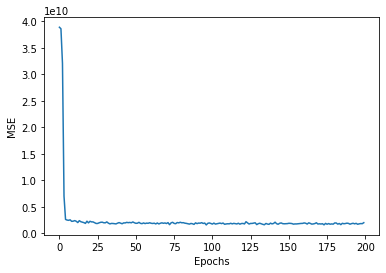

In [157]:
eval_model(seqmodel([16,50,70,100,70,30,1]), x_train,y_train,x_test,y_test)

Comparing model-I and model-II we can see that Model-II has performed better with ~86% R2 sore and 11% error.